# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [21]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

## Check for missing values and clean

In [22]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [23]:
df_flights.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [24]:
df_flights.dropna()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


## Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

In [25]:
# Identify and eliminate outliers in DepDelay and ArrDelay columns

# Calculate the z-score for DepDelay and ArrDelay
zscore_dep_delay = (df_flights['DepDelay'] - df_flights['DepDelay'].mean()) / df_flights['DepDelay'].std()
zscore_arr_delay = (df_flights['ArrDelay'] - df_flights['ArrDelay'].mean()) / df_flights['ArrDelay'].std()

# Define a threshold for outliers
threshold = 3

# Filter out the rows with z-score greater than the threshold
df_flights_filtered = df_flights[(zscore_dep_delay.abs() <= threshold) & (zscore_arr_delay.abs() <= threshold)]

# Print the number of rows before and after filtering
print('Number of rows before filtering:', len(df_flights))
print('Number of rows after filtering:', len(df_flights_filtered))


Number of rows before filtering: 271940
Number of rows after filtering: 265373


In [26]:
df_flights_filtered

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


Let's check if the outliers are properly removed

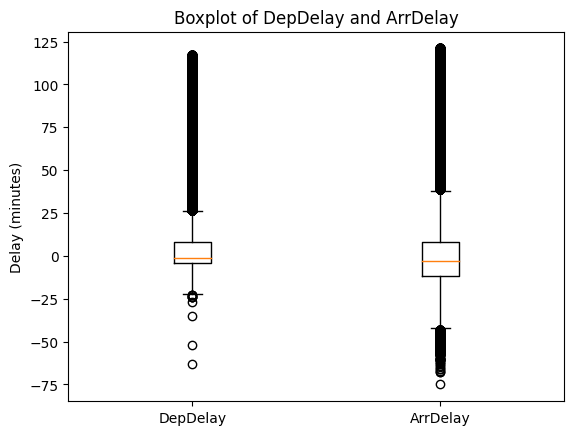

In [27]:
# Importing libraries
import matplotlib.pyplot as plt

# Creating a boxplot
plt.boxplot([df_flights_filtered['DepDelay'], df_flights_filtered['ArrDelay']])
plt.xticks([1, 2], ['DepDelay', 'ArrDelay'])
plt.ylabel('Delay (minutes)')
plt.title('Boxplot of DepDelay and ArrDelay')
plt.show()


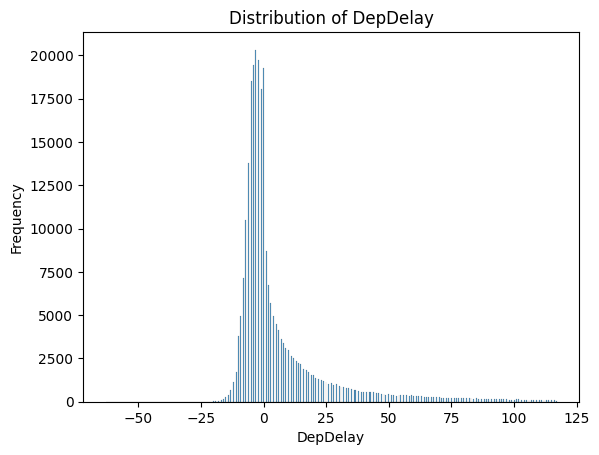

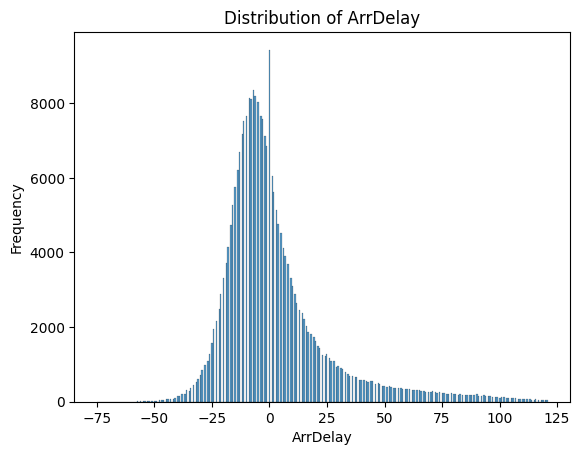

In [28]:
# Importing libraries
import seaborn as sns

# Plotting the distribution of DepDelay
sns.histplot(df_flights_filtered['DepDelay'])
plt.xlabel('DepDelay')
plt.ylabel('Frequency')
plt.title('Distribution of DepDelay')
plt.show()

# Plotting the distribution of ArrDelay
sns.histplot(df_flights_filtered['ArrDelay'])
plt.xlabel('ArrDelay')
plt.ylabel('Frequency')
plt.title('Distribution of ArrDelay')
plt.show()


There's still so much outliers. Let's reduce that by winsorizing the columns.

In [29]:
# Winsorize DepDelay and ArrDelay columns
df_flights_filtered['DepDelay'] = df_flights_filtered['DepDelay'].clip(lower=df_flights_filtered['DepDelay'].quantile(0.01), upper=df_flights_filtered['DepDelay'].quantile(0.99))
df_flights_filtered['ArrDelay'] = df_flights_filtered['ArrDelay'].clip(lower=df_flights_filtered['ArrDelay'].quantile(0.01), upper=df_flights_filtered['ArrDelay'].quantile(0.99))


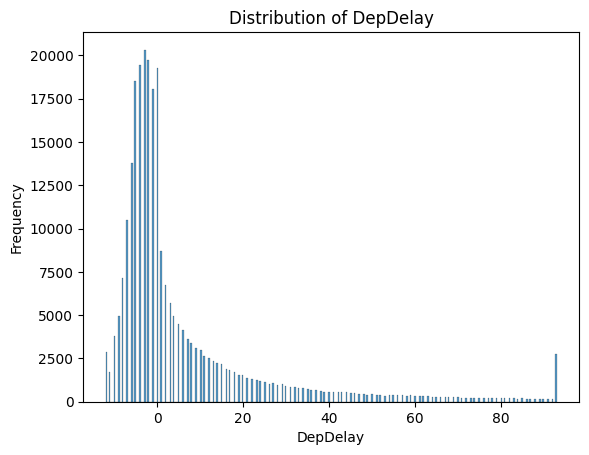

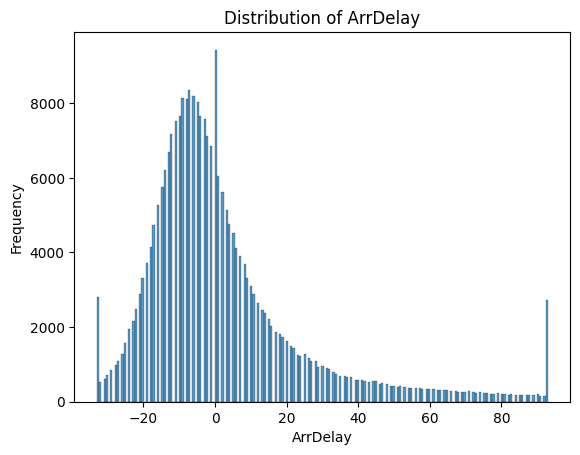

In [30]:
# Importing libraries
import seaborn as sns

# Plotting the distribution of DepDelay
sns.histplot(df_flights_filtered['DepDelay'])
plt.xlabel('DepDelay')
plt.ylabel('Frequency')
plt.title('Distribution of DepDelay')
plt.show()

# Plotting the distribution of ArrDelay
sns.histplot(df_flights_filtered['ArrDelay'])
plt.xlabel('ArrDelay')
plt.ylabel('Frequency')
plt.title('Distribution of ArrDelay')
plt.show()

## Explore the Data

**Firstly, let's get the summary statistics of the numeric columns**

In [31]:
df_flights_filtered.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,265373.0,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000,262612.000000,265373.000000,265373.000000,265373.000000,265373.000000
mean,2013.0,6.990003,15.804995,3.901117,12746.581864,12739.644858,1320.075686,6.146450,0.181252,1500.292513,2.155999,0.196527,0.010917
std,0.0,1.987058,8.809031,1.989264,1502.359475,1503.355507,470.763952,19.546588,0.385228,492.442900,22.795910,0.397372,0.103911
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-12.000000,0.000000,1.000000,-33.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,915.000000,-4.000000,0.000000,1115.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1315.000000,-1.000000,0.000000,1523.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1720.000000,8.000000,0.000000,1915.000000,8.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,93.000000,1.000000,2359.000000,93.000000,1.000000,1.000000


## What are the mean departure and arrival delays?

In [32]:
# Calculate the average DepDelay
avg_dep_delay = df_flights_filtered['DepDelay'].mean()

# Calculate the average ArrDelay
avg_arr_delay = df_flights_filtered['ArrDelay'].mean()

avg_dep_delay, avg_arr_delay

(6.146450467832071, 2.155999291563196)

## How do the carriers compare in terms of arrival delay performance?

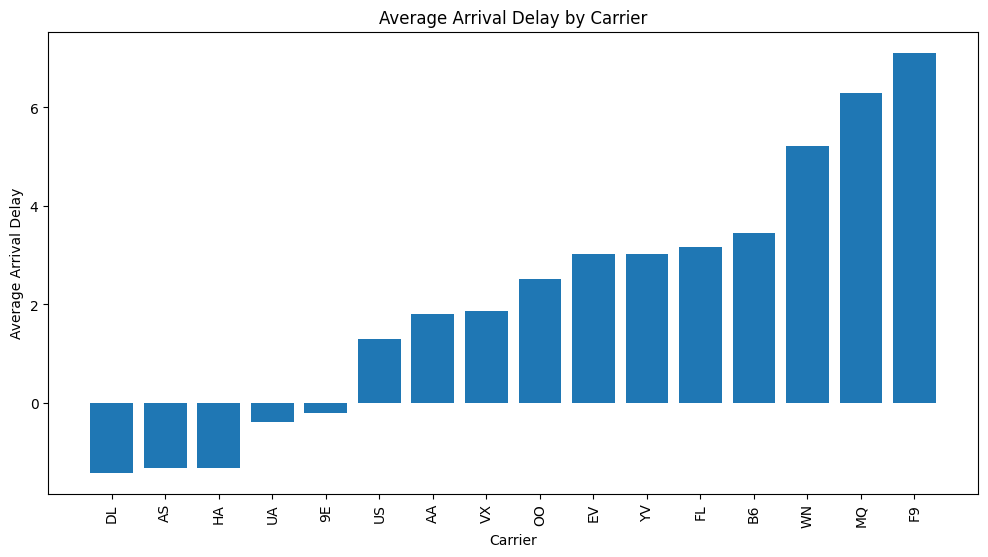

In [33]:
# Group the data by Carrier and calculate the average arrival delay

avg_arr_delay_by_carrier = df_flights_filtered.groupby('Carrier')['ArrDelay'].mean()

# Sort the carriers based on average arrival delay

sorted_carriers = avg_arr_delay_by_carrier.sort_values()

# Plot the average arrival delay by carrier

plt.figure(figsize=(12, 6))
plt.bar(sorted_carriers.index, sorted_carriers.values)
plt.xlabel('Carrier')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Carrier')
plt.xticks(rotation=90)
plt.show()


## Are some days of the week more prone to arrival days than others?

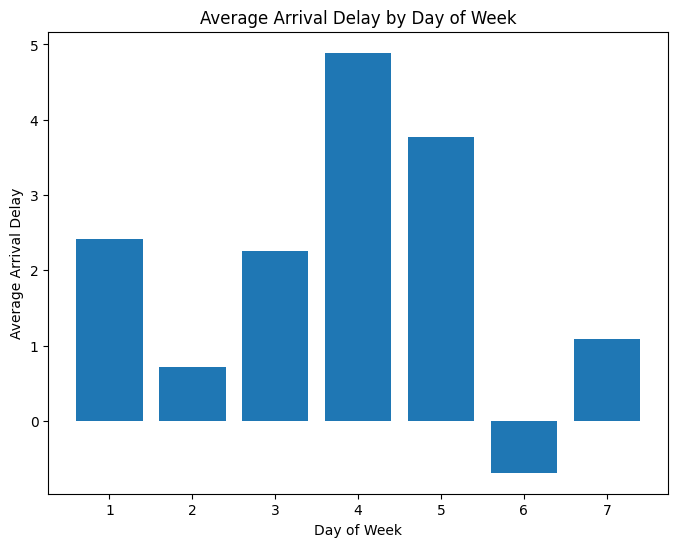

In [34]:
# Group the data by DayOfWeek and calculate the average arrival delay

avg_arr_delay_by_day = df_flights_filtered.groupby('DayOfWeek')['ArrDelay'].mean()

# Sort the days of the week based on average arrival delay

sorted_days = avg_arr_delay_by_day.sort_values()

# Plot the average arrival delay by day of the week

plt.figure(figsize=(8, 6))
plt.bar(sorted_days.index, sorted_days.values)
plt.xlabel('Day of Week')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Day of Week')
plt.xticks(rotation=0)
plt.show()


## Which departure airport has the highest average departure delay?

In [35]:
highest_avg_dep_ori = df_flights_filtered.groupby('OriginAirportName')['DepDelay'].mean()
highest_avg_dep_ori_sorted = highest_avg_dep_ori.sort_values()
highest_avg_dep_ori_sorted

OriginAirportName
Ted Stevens Anchorage International     0.479250
Kahului Airport                         0.511770
Long Beach Airport                      0.768575
Tucson International                    1.027548
Honolulu International                  1.578062
                                         ...    
Dallas/Fort Worth International         9.486236
Chicago O'Hare International            9.590080
Denver International                    9.728081
William P Hobby                        10.045092
Chicago Midway International           12.236424
Name: DepDelay, Length: 70, dtype: float64

## Do late departures tend to result in longer arrival delays than on-time departures?

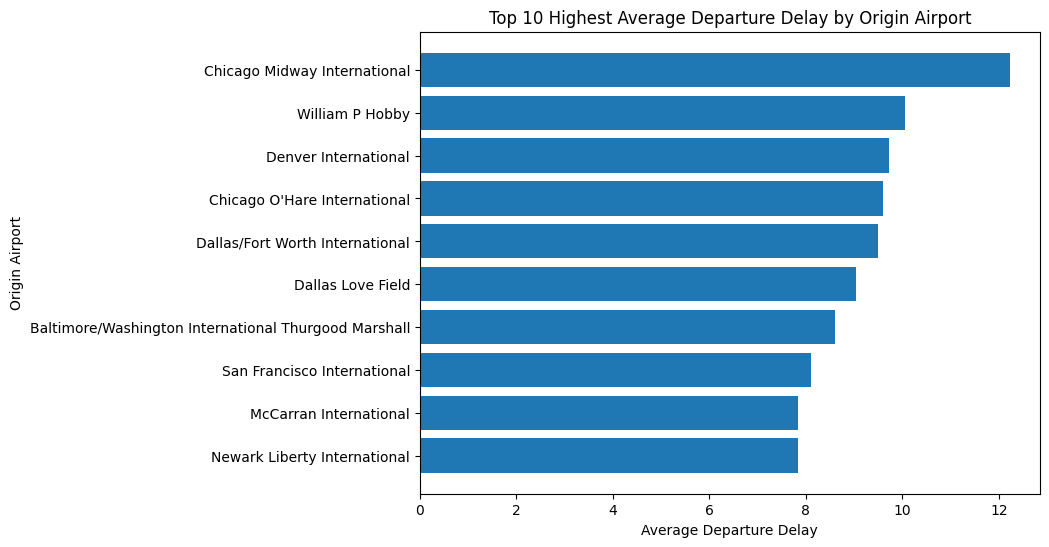

In [36]:
# Plot the top 10 highest average departure delay by origin airport
plt.figure(figsize=(8, 6))
plt.barh(highest_avg_dep_ori_sorted.index[-10:], highest_avg_dep_ori_sorted.values[-10:])
plt.xlabel('Average Departure Delay')
plt.ylabel('Origin Airport')
plt.title('Top 10 Highest Average Departure Delay by Origin Airport')
plt.show()


<AxesSubplot: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

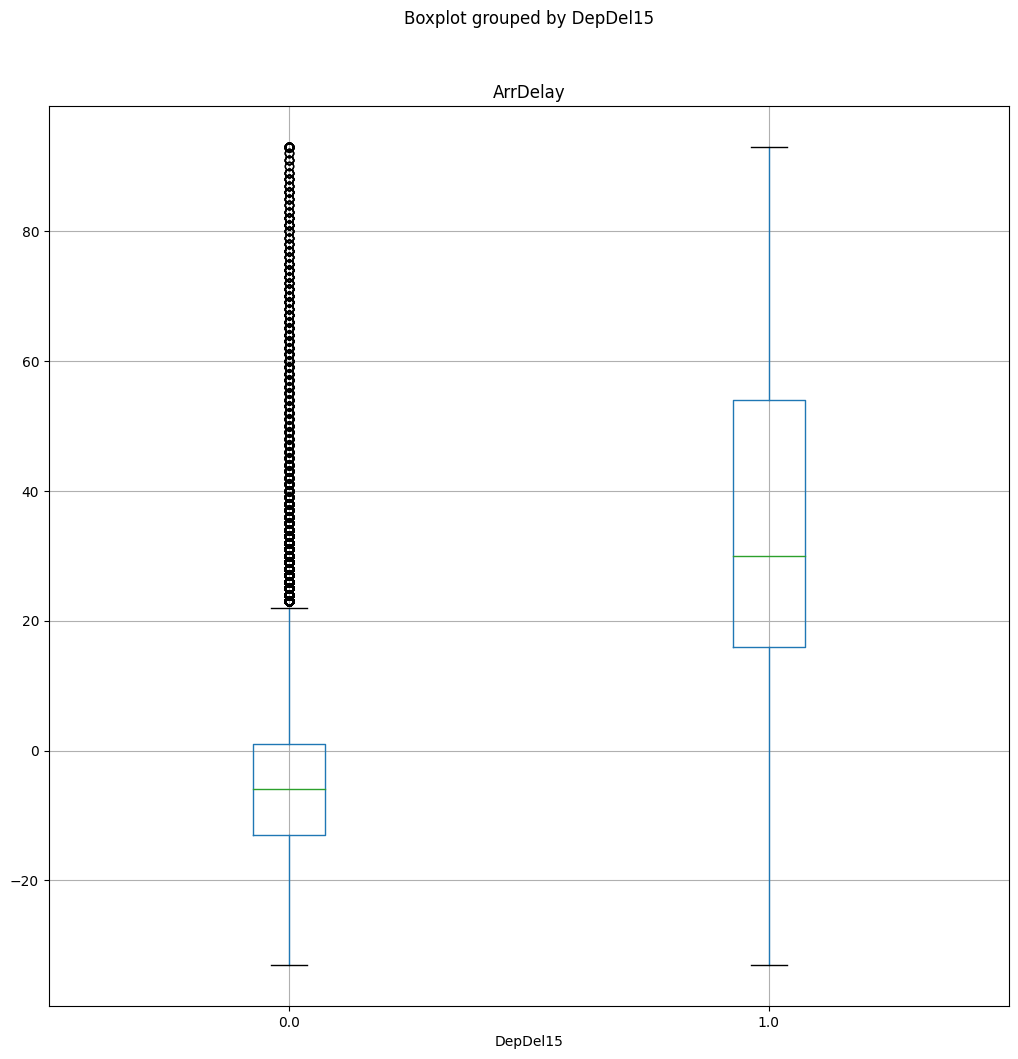

In [37]:
df_flights_filtered.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

## Which route (from origin airport to destination airport) has the most late arrivals?

In [38]:
# Add a routes column
routes  = pd.Series(df_flights_filtered['OriginAirportName'] + ' > ' + df_flights_filtered['DestAirportName'])
df_flights_filtered = pd.concat([df_flights_filtered, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights_filtered.groupby(df_flights_filtered.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
Los Angeles International > San Francisco International,274
San Francisco International > Los Angeles International,257
LaGuardia > Hartsfield-Jackson Atlanta International,167
McCarran International > San Francisco International,156
Los Angeles International > McCarran International,143
...,...
Cleveland-Hopkins International > Ronald Reagan Washington National,0
Southwest Florida International > Port Columbus International,0
Cleveland-Hopkins International > Seattle/Tacoma International,0


## Which route has the highest average arrival delay?

In [39]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Pittsburgh International > Raleigh-Durham International,63.000000
Southwest Florida International > Theodore Francis Green State,44.000000
Minneapolis-St Paul International > Richmond International,37.000000
Cleveland-Hopkins International > Philadelphia International,33.461538
Metropolitan Oakland International > Logan International,31.428571
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-22.200000
Jacksonville International > Chicago Midway International,-22.363636
